In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data wr final project/Updated_Student_Performance_Scaled.csv')
df.head()

,Student_ID,Age,Gender,Grade_Level,Course_Name,Final_Grade,Cumulative_GPA,Attendance_Rate,Online_Learning_Hours,Class_Participation_Score
0,S1409,NaN,Other,11th Grade,Science,NaN,NaN,NaN,67.223852,57.836077
1,S5506,Eighteen,Male,11th Grade,Writing,B,3.480693454,87.644398,85.627646,82.136409
2,S2424,14,Female,11th Grade,Math,C,1.829984912,48.846757,33.904271,26.623638
3,S7912,NaN,Other,12th Grade,History,NaN,NaN,NaN,92.309298,83.282021
4,S1520,17,Other,12th Grade,History,A,3.791215152,96.300886,88.618144,85.737542


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10097 entries, 0 to 10096
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_ID                 9090 non-null   object 
 1   Age                        8975 non-null   object 
 2   Gender                     10097 non-null  object 
 3   Grade_Level                10097 non-null  object 
 4   Course_Name                10097 non-null  object 
 5   Final_Grade                8967 non-null   object 
 6   Cumulative_GPA             9073 non-null   object 
 7   Attendance_Rate            8974 non-null   float64
 8   Online_Learning_Hours      10097 non-null  float64
 9   Class_Participation_Score  10097 non-null  float64
dtypes: float64(3), object(7)
memory usage: 789.0+ KB


In [ ]:
df.describe()

,Attendance_Rate,Online_Learning_Hours,Class_Participation_Score
count,8974.000000,10097.000000,10097.000000
mean,76.248874,69.841574,67.560172
std,18.328951,92.289562,25.539944
min,40.009436,-600.000000,20.016721
25%,60.080638,50.093931,50.081052
50%,79.950013,80.044033,80.026938
75%,92.399044,89.957377,90.047437
max,99.992743,7300.000000,99.994296


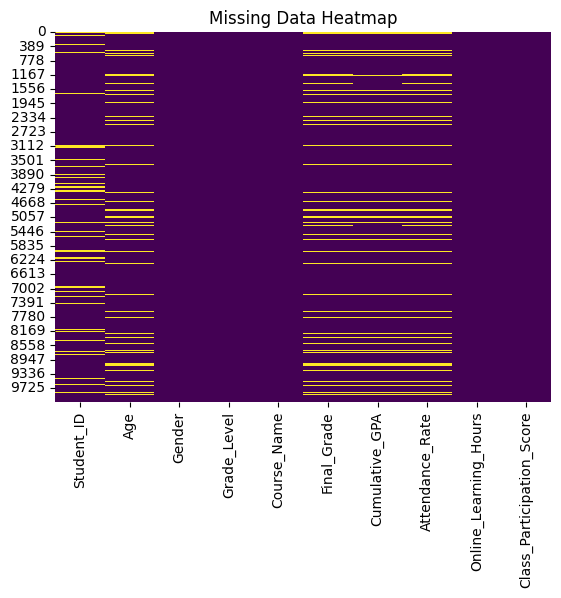

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

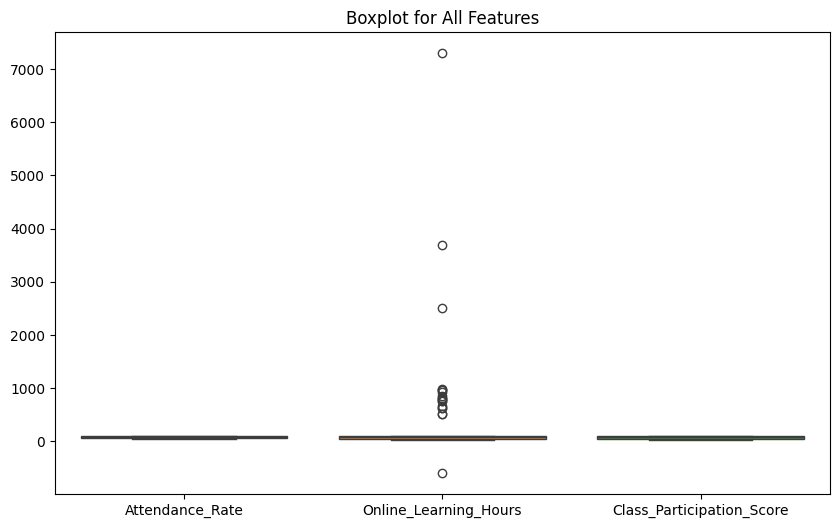

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Features")
plt.show()

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 5


In [ ]:
df = df.drop_duplicates()

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Student_ID                   1007
Age                          1117
Gender                          0
Grade_Level                     0
Course_Name                     0
Final_Grade                  1125
Cumulative_GPA               1024
Attendance_Rate              1118
Online_Learning_Hours           0
Class_Participation_Score       0
dtype: int64


In [ ]:
max_id = df['Student_ID'].dropna().str.extract('(\d+)').astype(int).max()[0]

missing_count = df['Student_ID'].isnull().sum()
new_ids_for_missing = [f"S{int(max_id) + i + 1}" for i in range(missing_count)]
df.loc[df['Student_ID'].isnull(), 'Student_ID'] = new_ids_for_missing

In [ ]:
duplicates = df['Student_ID'].duplicated(keep='first')

new_ids_for_duplicates = [f"S{int(max_id) + i + 1 + missing_count}" for i in range(duplicates.sum())]
df.loc[duplicates, 'Student_ID'] = new_ids_for_duplicates

In [ ]:
print(df['Age'].unique())

[nan 'Eighteen' '14' '17' '15' '16' '18']


In [ ]:
fixes = {'Eighteen': 18}
df['Age'] = df['Age'].replace(fixes)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Age'] = df['Age'].astype(int)

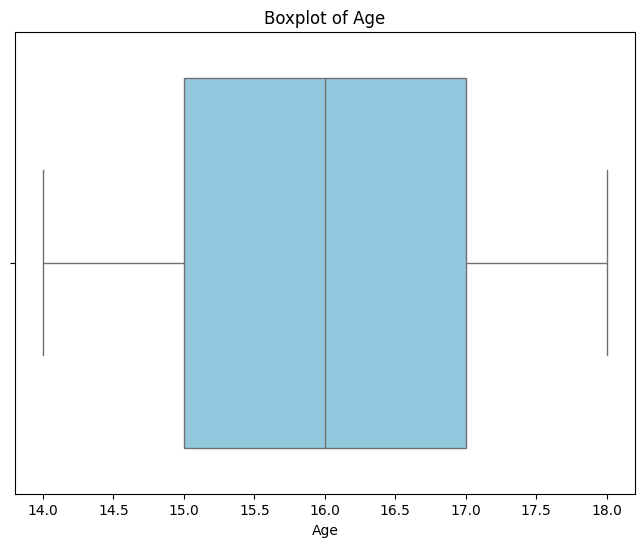

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='median')
df['Attendance_Rate'] = imputer.fit_transform(df[['Attendance_Rate']])

In [ ]:
df['Attendance_Rate'] = df['Attendance_Rate'].astype(int)

In [ ]:
Q1 = df['Online_Learning_Hours'].quantile(0.25)
Q3 = df['Online_Learning_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Online_Learning_Hours'] < lower_bound) | (df['Online_Learning_Hours'] > upper_bound)]

num_outliers = outliers.shape[0]
print(f"Number of outliers in Online_Learning_Hours: {num_outliers}")

Number of outliers in Online_Learning_Hours: 14


In [ ]:
lower_bound = df['Online_Learning_Hours'].quantile(0.05)
upper_bound = df['Online_Learning_Hours'].quantile(0.95)

df['Online_Learning_Hours'] = df['Online_Learning_Hours'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
df['Online_Learning_Hours'] = df['Online_Learning_Hours'].astype(int)

In [ ]:
df['Class_Participation_Score'] = df['Class_Participation_Score'].astype(int)

In [ ]:
df['Cumulative_GPA'] = pd.to_numeric(df['Cumulative_GPA'], errors='coerce')

In [ ]:
df_with_gpa = df[df['Cumulative_GPA'].notnull()]
df_without_gpa = df[df['Cumulative_GPA'].isnull()]

X = df_with_gpa[['Attendance_Rate', 'Online_Learning_Hours', 'Class_Participation_Score']]
y = df_with_gpa['Cumulative_GPA']

rf = RandomForestRegressor()
rf.fit(X, y)

X_missing = df_without_gpa[['Attendance_Rate', 'Online_Learning_Hours', 'Class_Participation_Score']]
predicted_gpa = rf.predict(X_missing)

df.loc[df['Cumulative_GPA'].isnull(), 'Cumulative_GPA'] = predicted_gpa

print(df.head())

  Student_ID  Age  Gender Grade_Level Course_Name Final_Grade  Cumulative_GPA  \
0      S1409   16   Other  11th Grade     Science         NaN        3.059048   
1      S5506   18    Male  11th Grade     Writing           B        3.480693   
2      S2424   14  Female  11th Grade        Math           C        1.829985   
3      S7912   16   Other  12th Grade     History         NaN        3.346075   
4      S1520   17   Other  12th Grade     History           A        3.791215   

   Attendance_Rate  Online_Learning_Hours  Class_Participation_Score  
0               79                     67                         57  
1               87                     85                         82  
2               48                     33                         26  
3               79                     92                         83  
4               96                     88                         85  


In [ ]:
print(df['Final_Grade'].unique())

[nan 'B' 'C' 'A' 'D']


In [ ]:
gpa_bins = [0, 1.0, 2.0, 3.0, 3.5, 4.0]
grade_labels = ['F', 'D', 'C', 'B', 'A']

df['Final_Grade'] = df['Final_Grade'].where(
    df['Final_Grade'].notna(),
    pd.cut(df['Cumulative_GPA'], bins=gpa_bins, labels=grade_labels, right=True)
)


In [ ]:
df.head()

,Student_ID,Age,Gender,Grade_Level,Course_Name,Final_Grade,Cumulative_GPA,Attendance_Rate,Online_Learning_Hours,Class_Participation_Score
0,S1409,16,Other,11th Grade,Science,B,3.059048,79,67,57
1,S5506,18,Male,11th Grade,Writing,B,3.480693,87,85,82
2,S2424,14,Female,11th Grade,Math,C,1.829985,48,33,26
3,S7912,16,Other,12th Grade,History,B,3.346075,79,92,83
4,S1520,17,Other,12th Grade,History,A,3.791215,96,88,85


In [ ]:
print(df['Gender'].unique())

['Other' 'Male' 'Female']


In [ ]:
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].apply(lambda x: mode_gender if x not in ['Male', 'Female'] else x)

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df = df.rename(columns={'Cumulative_GPA': 'GPA'})

In [ ]:
df['GPA'] = df['GPA'].round(2)
df.head()

,Student_ID,Age,Gender,Grade_Level,Course_Name,Final_Grade,GPA,Attendance_Rate,Online_Learning_Hours,Class_Participation_Score
0,S1409,16,1,11th Grade,Science,B,3.06,79,67,57
1,S5506,18,1,11th Grade,Writing,B,3.48,87,85,82
2,S2424,14,0,11th Grade,Math,C,1.83,48,33,26
3,S7912,16,1,12th Grade,History,B,3.35,79,92,83
4,S1520,17,1,12th Grade,History,A,3.79,96,88,85


In [ ]:
df['Attendance_Performance'] = pd.cut(df['Attendance_Rate'], bins=[0, 60, 80, 100], labels=['Poor', 'Average', 'Excellent'])

In [ ]:
course_gpa_avg = df.groupby('Course_Name')['GPA'].mean()
df['course_gpa_avg'] = df['Course_Name'].map(course_gpa_avg)
df['course_gpa_avg'] = df['course_gpa_avg'].round(2)

In [ ]:
course_gpa_avg = df.groupby('Course_Name')['GPA'].mean()
df['Course_Difficulty'] = df['Course_Name'].map(lambda x: 'Hard' if course_gpa_avg[x] < 2.5 else 'Easy' if course_gpa_avg[x] > 3.5 else 'Moderate')

In [ ]:
df.head()

,Student_ID,Age,Gender,Grade_Level,Course_Name,Final_Grade,GPA,Attendance_Rate,Online_Learning_Hours,Class_Participation_Score,Attendance_Performance,course_gpa_avg,Course_Difficulty
0,S1409,16,1,11th Grade,Science,B,3.06,79,67,57,Average,2.77,Moderate
1,S5506,18,1,11th Grade,Writing,B,3.48,87,85,82,Excellent,3.64,Easy
2,S2424,14,0,11th Grade,Math,C,1.83,48,33,26,Poor,2.00,Hard
3,S7912,16,1,12th Grade,History,B,3.35,79,92,83,Average,3.64,Easy
4,S1520,17,1,12th Grade,History,A,3.79,96,88,85,Excellent,3.64,Easy


<ipython-input-87-f797de5f100c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Course_Name', y='course_gpa_avg', data=df, palette='viridis')


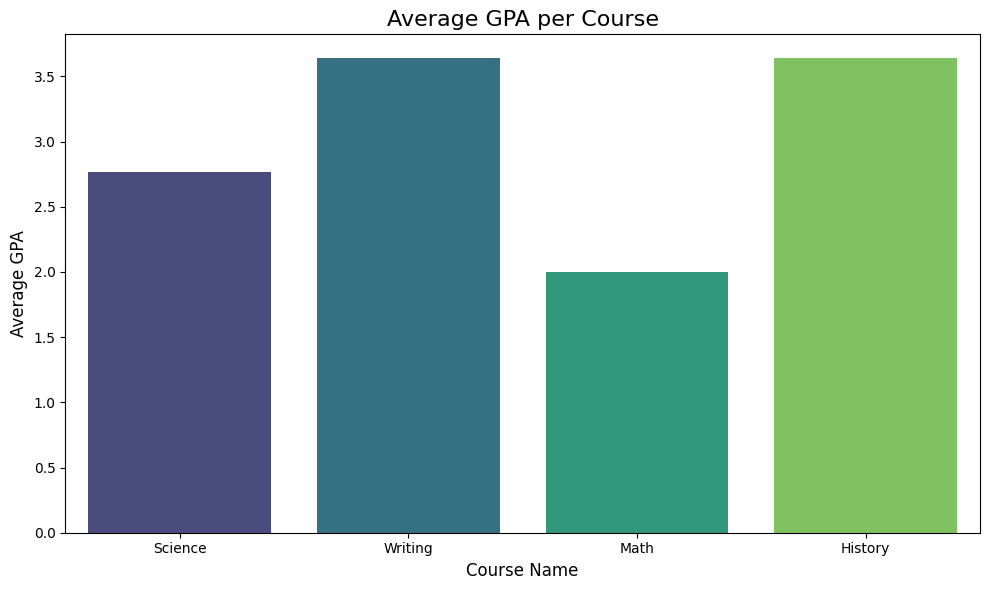

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_Name', y='course_gpa_avg', data=df, palette='viridis')

plt.title('Average GPA per Course', fontsize=16)
plt.xlabel('Course Name', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.tight_layout()
plt.show()

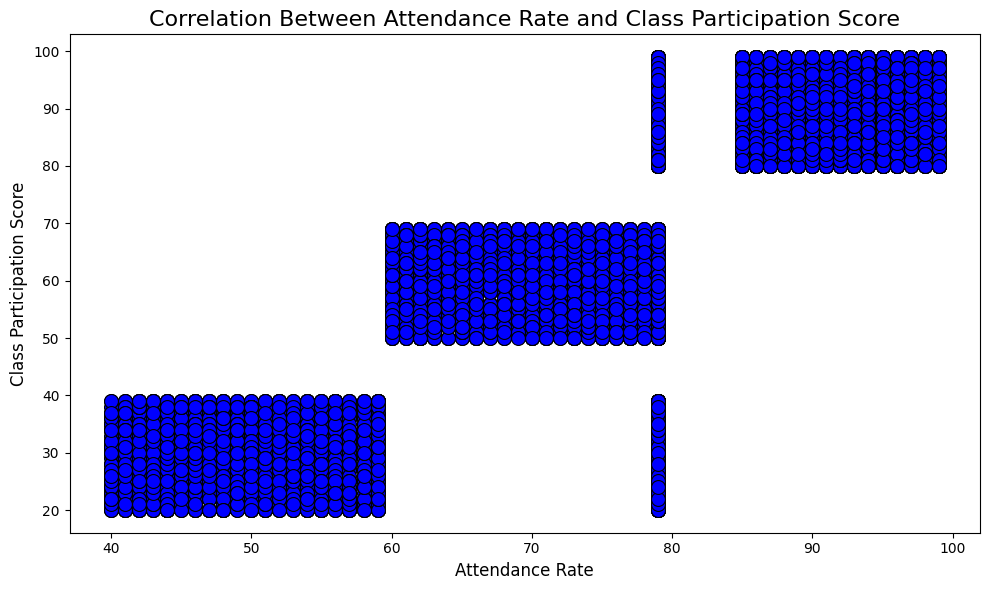

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance_Rate', y='Class_Participation_Score', data=df, color='blue', s=100, edgecolor='black')

plt.title('Correlation Between Attendance Rate and Class Participation Score', fontsize=16)
plt.xlabel('Attendance Rate', fontsize=12)
plt.ylabel('Class Participation Score', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>